In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import sklearn.model_selection as skm
import sklearn as sk


# Support Vector Machine
***

In this notebook we will approach the prediction problem using SVMs.

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We convert the targets into an appropriate format and split the data into training and test data (70/30 split).

In [3]:
Y = np.where(train_data['Survived']==0, -1, train_data['Survived'])

features = ["Pclass", "Sex", "SibSp", "Parch","Fare"]
X = pd.get_dummies(train_data[features])

X_train, X_test, y_train, y_test = skm.train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
X_train

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
445,1,0,2,81.8583,False,True
650,3,0,0,7.8958,False,True
172,3,1,1,11.1333,True,False
450,2,1,2,27.7500,False,True
314,2,1,1,26.2500,False,True
...,...,...,...,...,...,...
106,3,0,0,7.6500,True,False
270,1,0,0,31.0000,False,True
860,3,2,0,14.1083,False,True
435,1,1,2,120.0000,True,False


In [5]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=10, kernel='linear')

We perform K(=5)-fold cross validation in order to find a suitable regularisation parameter.

In [10]:
kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)

grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.005,0.01,0.1,1]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.cv_results_[('mean_test_score')])

{'C': 0.1}
[0.67092903 0.70464516 0.78331613 0.78494194 0.78494194]


We check out how well this performs on the test data with the aid of a confusion matrix.

The fraction of correct predictions is 0.79
The precision is 0.77
The recall is 0.7
The specificity is 0.8


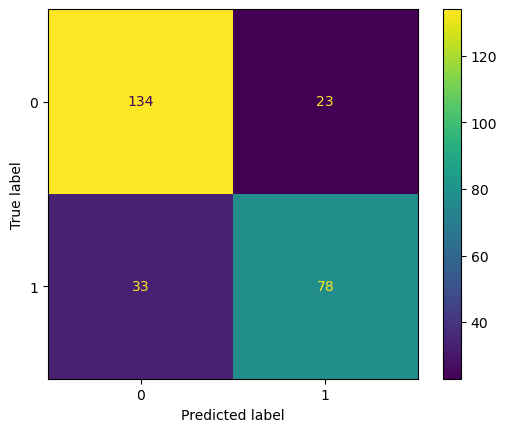

In [11]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
CM = sk.metrics.confusion_matrix( y_test, y_test_hat )
sk.metrics.ConfusionMatrixDisplay(CM).plot()
print("The fraction of correct predictions is {0:.2}".format((CM[0][0]+CM[1][1])/(CM[0][0]+CM[1][1]+CM[0][1]+CM[1][0])))
print("The precision is {0:.2}".format((CM[1][1])/(CM[1][1]+CM[0][1])))
print("The recall is {0:.2}".format((CM[1][1])/(CM[1][1]+CM[1][0])))
print("The specificity is {0:.2}".format(CM[0][0]/(CM[0][0]+CM[1][0])))

In [20]:
def solution(A,B):

    hashA = {}
    hashB = {}
    for x in A:
        if x in hashA:
            hashA[x] += 1
        else:
            hashA[x] = 1

    for x in B:
        if x in hashB:
            hashB[x] += 1
        else:
            hashB[x] = 1
    
    count =0
    for x in hashA:
        if x not in hashB.keys():
            count += hashA[x]
    for x in hashB:
        if x not in hashA:
            count += hashB[x]
    
    return count

In [21]:
solution([1,1,2,3,4,5,4,7,6,9,10],[11,12,13,4,5,6,7,18,19,20])

12

In [30]:
import functools 

def solution(N,A,B,K,paths):

    hashPaths = {(x[0],x[1]):x[2] for x in paths}

    @functools.lru_cache(maxsize=None)
    def dp(i,j,k):
        # Base Cases
        if k < 0:
            return float('inf')
        elif i == j:
            return 0
        elif k == 0 and (i,j) in hashPaths:
            return hashPaths[(i,j)]
        elif k == 0 and (j,i) in hashPaths:
            return hashPaths[(j,i)]
        
        cost = float('inf')
        for l in range(N):
            if (i,l) in hashPaths:
                cost = min( hashPaths[(i,l)] + dp(l,j,k), dp(l,j,k-1) )
            elif (l,i) in hashPaths:
                cost = min( hashPaths[(l,i)] + dp(l,j,k), dp(l,j,k-1) )
        return cost
    
    return dp(A,B,K)


In [32]:
P = [[0,1,1],[0,4,1],[1,2,2],[2,3,4],[4,3,7]]
# solution(5,0,3,1,P)

In [45]:
import functools 

def DPSolution(N,paths):

    cost = {(x[0],x[1]):x[2] for x in paths}

    for i in range(N):
        for j in range(N):
            if i == j:
                cost[(i,j)] = 0
            elif (i,j) in cost:
                cost[(i,j)] = cost[(i,j)]
            # elif (j,i) in cost:
            #     cost[(i,j)] = cost[(j,i)]
            else:
                cost[(i,j)] = float('inf')


    dp = [[float('inf')]*N for _ in range(N)]
    
    for i in range(N):
        dp[i][0] = 0

    for i in range(1,N):
        for j in range(1,N):
            minimum = min(dp[i][j], cost[(i,j)])
            for k in range(1,N):
                    dp[i][j] = min(minimum, dp[k][j-1] + cost[(k,i)]) 
    print(cost)              
    return dp


In [46]:
P = [[0,1,100],[0,3,200],[3,1,-150],[1,2,100],[0,2,500],[2,3,100]]
DPSolution(4,P)

{(0, 1): 100, (0, 3): 200, (3, 1): -150, (1, 2): 100, (0, 2): 500, (2, 3): 100, (0, 0): 0, (1, 0): inf, (1, 1): 0, (1, 3): inf, (2, 0): inf, (2, 1): inf, (2, 2): 0, (3, 0): inf, (3, 2): inf, (3, 3): 0}


[[0, inf, inf, inf],
 [0, -150, 100, inf],
 [0, inf, 0, 100],
 [0, -150, -150, -150]]